Zadanie1: Zaimplementuj filtry Sobela a następnie przetestuj na przykładowej fotografii 1D (odcienie szarości).

In [13]:
import numpy as np
import matplotlib.pyplot as plt
 
#wczytuję zdjęcie
 
input_image = plt.imread('./einstein.jpg')


In [19]:
#funkcja, która przekształci mi macierze na filtry

from scipy.signal import convolve2d
 
def matrix_to_filters(img, kernel, title=''):
 
    feature = convolve2d(img, kernel, boundary='symm', mode='same')
 
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(img, 'gray')
    ax1.set_title('Input image', fontsize=15)
    ax1.set_xticks([])
    ax1.set_yticks([])
 
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.imshow(feature, 'gray')
    ax2.set_title(f' {title}', fontsize=15)
    ax2.set_xticks([])
    ax2.set_yticks([])
    plt.show()

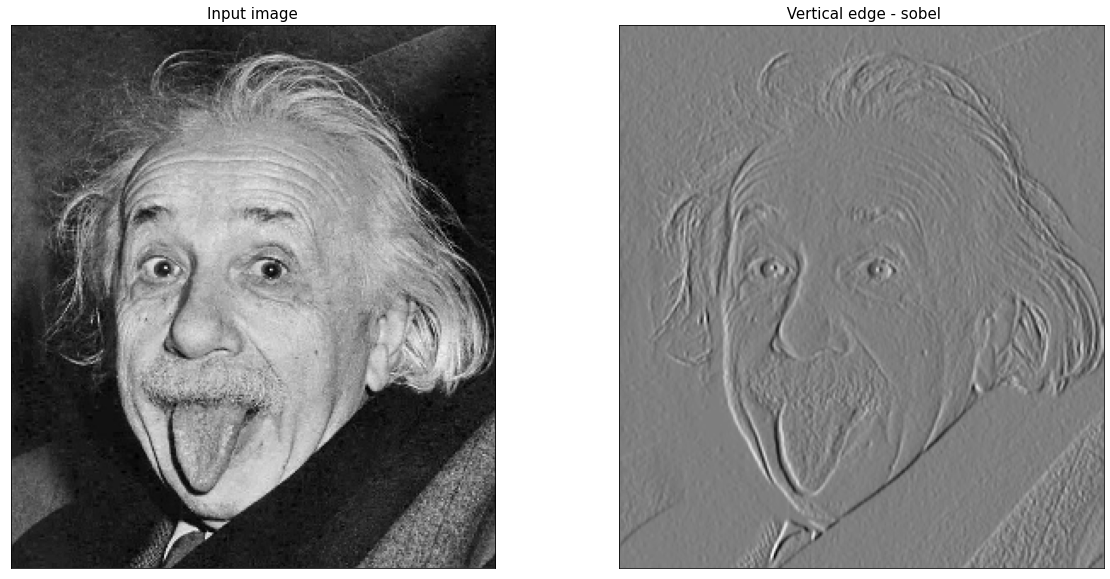

In [20]:
kernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])
 
matrix_to_filters(small_image, kernel, 'Vertical edge - sobel')

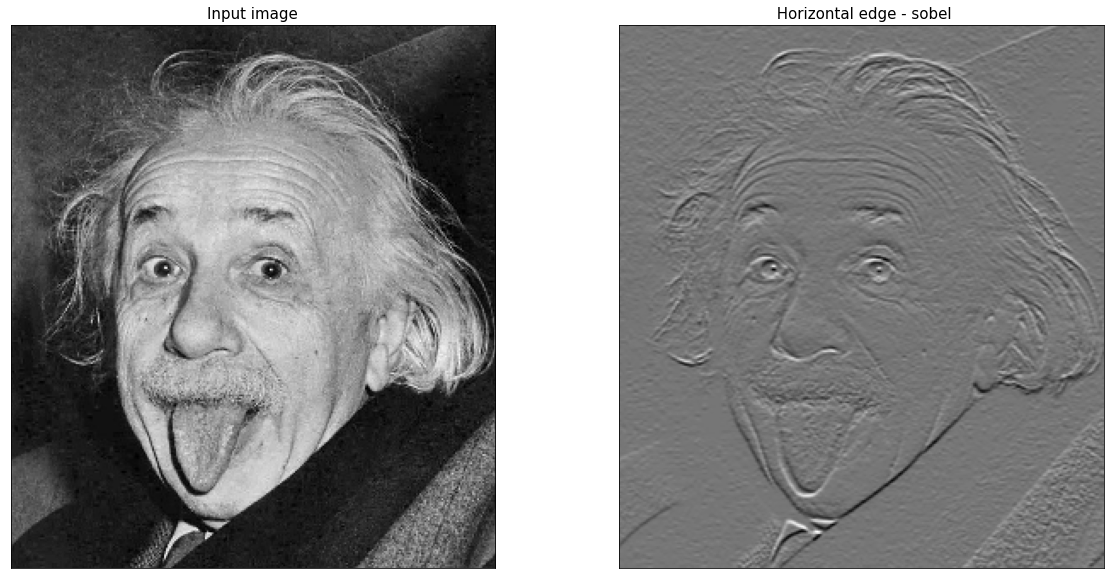

In [21]:
kernel = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]])
 
matrix_to_filters(small_image, kernel, 'Horizontal edge - sobel')

Zadanie2: Uzasadnij, że liczba parametrów warstwy konwolucyjnej wyraża się następującym wzorem:

Przykładowo: mamy obrazek o wymiarach 39x39x3. Wtedy we wzorze kH=kW=39, a kC (liczba kanałów wejściowych) jest równa 3.
Załóżmy, że pierwsza wartstwa wykorzystuje filtr o wymiarach 3x3, wtedy możemy sobie określić, np. f (features = cechy), które jest równe 3 (ze względu na rozmiar filtra). Zakładamy także, że s (stride) = 1, chodzi o krotność filtru, przesuwa się o jedną jednostkę na raz. p (padding) = 0, a filtrów używamy na przykład 10. </p>
W wyniku takiego działania otrzymujemy sieć o wymiarach 37x37x10. 10 pochodzi od ilości użytych filtrów. </p>
Wartość 37 bierze się natomiast ze wzoru (k+2p-f)/s + 1, czyli w tym wypadku (39+0-3)/1 + 1, a to wynosi 37. </p>
Gdybyśmy natomiast wykonali operację odwrotną, będzie to odpowiadać wartości wyjściowej wzoru, co go uzasadnia.

Zadanie3: Uzasadnij, że rozmiar wynikowej mapy cech wyraża się poprzez:

Na podstawie uzasadnienia z zadania 2, jeśli zwielokrotnimy takie działanie, za każdym razem stosując n filtrów, na końcu otrzymamy ciąg m obrazów powstałych w kolejnych warstwach. Ostatni obraz stanowi wysokopoziomową reprezentację początkowego obrazu. </p>
W zakresie jednej mapy cech wszystkie neurony współdzielą te same parametry (wagi i człon obciążenia),
natomiast inne mapy cech mogą mieć inne wartości parametrów. Warstwa splotowa stosuje
równocześnie różne filtry na wejściach, dzięki czemu wykrywa jednocześnie wiele cech w dowolnym
obszarze obrazu (tak jak w podanym wzorze). </p>
Za każdym razem mnożąc macierz, przesuwamy po niej filtr. Dodanie 1 właśnie na to wskazuje. Na końcu otrzymujemy mapę cech (najczęściej o wartościach maksymalnych), która ma wielkość filtra (np. 3x3), którym "przesuwaliśmy" po macierzy wyjściowej.

Zadanie4: Napisać funkcje do interpolacji zdjęć na dowolnie zadany wymiar. Przykładowo, mamy zdjecie 4x5, chcemy 10x12. Uwaga: W przypadku wielokrotności rozmiaru jest to stosunkowo proste zadanie.

In [ ]:
#nie byłam pewna czy chodzi o sam rozmiar, czy o piksele same w sobie czy jedno i drugie

#poniżej przykładowo do rozmiaru
from PIL import Image

def size_of_picture(input_image_path,
                 output_image_path,
                 size):
    original_image = Image.open(input_image_path)
    width, height = original_image.size
    print('Oryginalny rozmiar obrazu {wide} szerokość x {height} '
          'wysokość'.format(wide=width, height=height))
    resized_image = original_image.resize(size)
    width, height = resized_image.size
    print('Zmieniony rozmiar obrazu {wide} szerokość x {height} '
          'wysokość'.format(wide=width, height=height))
    resized_image.show()
    resized_image.save(output_image_path)
if __name__ == '__main__':
    resize_image(input_image_path='einstein.jpg',
                 output_image_path='einstein_bigger.jpg',
                 size=(534, 600)) #rozmiar można dowolnie zmieniać: zwiększać lub zmniejszać
#zrobiłam sobie analogicznie do przykładu definicji z klasy, które mieliśmy na Pythonie rok temu, 
#może nie wychodzi to idealnie, bo nie daje outputu poprawnego (coś tam nie halo z rozmiarem), ale już zostawiłam

In [ ]:
#tutaj gdybym miała robić bezpośrednią interpolację, czyli zwiększać/ zmniejszać ilość pikseli w obrębie obrazka
import os
import sys
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from PIL import Image

#tutaj trochę posiłkowałam się pomocą użytkowników Stacka i dokumentacją wbudowanej biblioteki interpolate, ale nie 
#chcę bezmyślnie kopiować kodu dlatego napiszę co bym zrobiła

#tutaj zrobiłabym interpolację, z tym że piksele dobierają się losowo
def interpolacja(nsamples):
   
    ix = np.random.randint(im.shape[1], size=nsamples)
    iy = np.random.randint(im.shape[0], size=nsamples)
    samples = im[iy,ix]
    input_image = griddata((iy, ix), samples, (Y, X))
    return input_image

#żeby łatwiej odczytać dane jeśli mam obrazek to mogę go przekonwertować na skalę szarości, ale zakładam, że już mam 
#ten obrazek z Einsteinem u siebie, to nie muszę tego robić. Mogę np. za pomocą macierzy.

#Teraz należałoby dobrać parametry obrazka, na którym chcemy pracować, no i załóżmy, np. (poniżej korzystam z kodu)
#na podstawie biblioteki

nrows, ncols = 2, 2 #tutaj określa mi liczbę kolum i wierszy na siatce
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6,4), dpi=100)
if nx < ny:
    w, h = fig.get_figwidth(), fig.get_figheight()
    fig.set_figwidth(h), fig.set_figheight(w)

#potem używam analogicznie do zadania pierwszego
for i in range(4):
    nsamples = 10**(i+2) #nsamples oznacza mi ilość punktów względem określenia pikseli i interpolacji
    axes = ax[get_indices(i)]
    axes.imshow(make_interpolated_image(nsamples),
                          cmap=plt.get_cmap('Szarości'))
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title('nsamples = {0:d}'.format(nsamples))
filestem = os.path.splitext(os.path.basename(img_name))[0]
plt.savefig('{0:s}_interp.png'.format(filestem), dpi=100)
#na bank nie mam tutaj pełnego kodu, bo czegoś mi nie pobiera, ale próbowałam :) 
#można to zapisać krócej/ inaczej, w zależności od tego jak pobieram sobie ścieżkę obrazka